# Mushroom Classification - Data Loading and Exploratory Data Analysis
***

The mushroom dataset consists of descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (this class was combined with the poisonous one). 

According to the original source, there is no simple rule for determining mushroom edibility based on physical traits. Therefore, **the goal of this project is to explore which features are most indicative of poisonous mushrooms and to evaluate which classification model best predicts edibility**.

The following sections present the attribute information, initial data loading, and a detailed exploratory data analysis (EDA) of the dataset.



**Attribute Information:** (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Data Loading and Initial Look

### Load libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Count number of rows and features

In [4]:
rows, col=df.shape
print(f'There are {rows} rows and {col} features')

There are 8124 rows and 23 features


### Check for any missing values

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
np.any(df.isnull())

False

### Check what type of features we have, categorical or numerical.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
pd.set_option('display.max_columns', None)
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


It seems like all of our features are categorical.

### Now let's check how many unique values there are for each feature.

In [11]:
#Unique values for each feature
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print(" ")


class: ['p' 'e']
 
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
 
cap-surface: ['s' 'y' 'f' 'g']
 
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
 
bruises: ['t' 'f']
 
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
 
gill-attachment: ['f' 'a']
 
gill-spacing: ['c' 'w']
 
gill-size: ['n' 'b']
 
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 
stalk-shape: ['e' 't']
 
stalk-root: ['e' 'c' 'b' 'r' '?']
 
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
 
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
 
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 
veil-type: ['p']
 
veil-color: ['w' 'n' 'o' 'y']
 
ring-number: ['o' 't' 'n']
 
ring-type: ['p' 'e' 'l' 'f' 'n']
 
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 
population: ['s' 'n' 'a' 'v' 'y' 'c']
 
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']
 


### Since veil-type feature only has one unique value, we need to drop it.

In [12]:
df = df.drop(columns='veil-type') #Only one unique 
df.shape

(8124, 22)

In [13]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Data Visualizations

### Count of edible vs poisonous mushroom. The target is encoded as 'e' for edible and 'p' for poisonous. 
There is no significant class imbalance between the two classes.

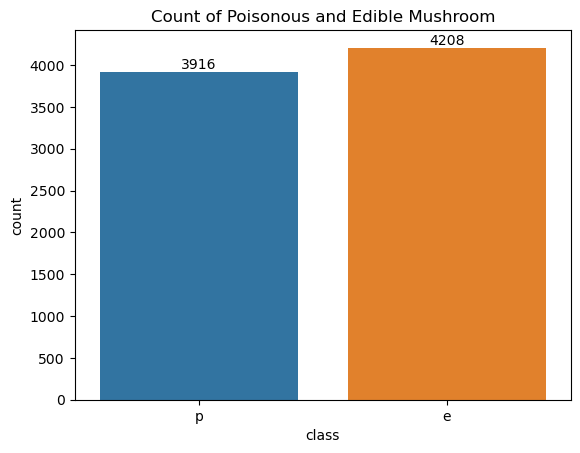

In [21]:
sns.countplot(x='class', data=df, hue='class')
plt.title("Count of Poisonous and Edible Mushroom")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()

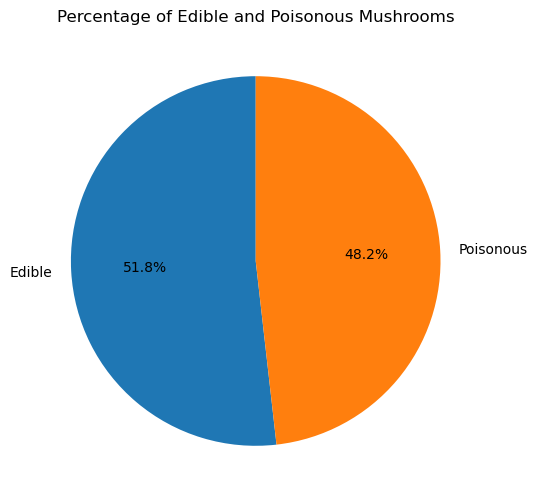

In [19]:
#get the percentage of p and e, then visualize using pie chart
proportion=df.groupby('class').size() / len(df) * 100

#Plot
plt.figure(figsize=(8, 6))
plt.pie(proportion, labels=['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Edible and Poisonous Mushrooms')
plt.show()

### Class Distribution by Feature Category (%)

This visualization shows the proportion of edible vs. poisonous mushrooms within each category of a feature. For example, given that gill-color = black, what percentage of those mushrooms are edible vs. poisonous? 

**P(class | feature category)**
- What is the probability of a class (edible or poisonous) given a specific feature category?

In [47]:
# Function to calculate percentages of each class (poisonous or edible) within categories of a feature

def class_percentage_in_category(df, feature, target='class'):
    
    #Group by feature and class, then count each occurrence
    percent_df = df.groupby([feature, target]).size().reset_index(name='count')
    
    #For each category in a feature, get the total occurences
    total_per_category = percent_df.groupby(feature)['count'].transform('sum')
    
    #Calculate percentage of each class within the category
    percent_df['percentage'] = percent_df['count'] / total_per_category * 100

    return percent_df

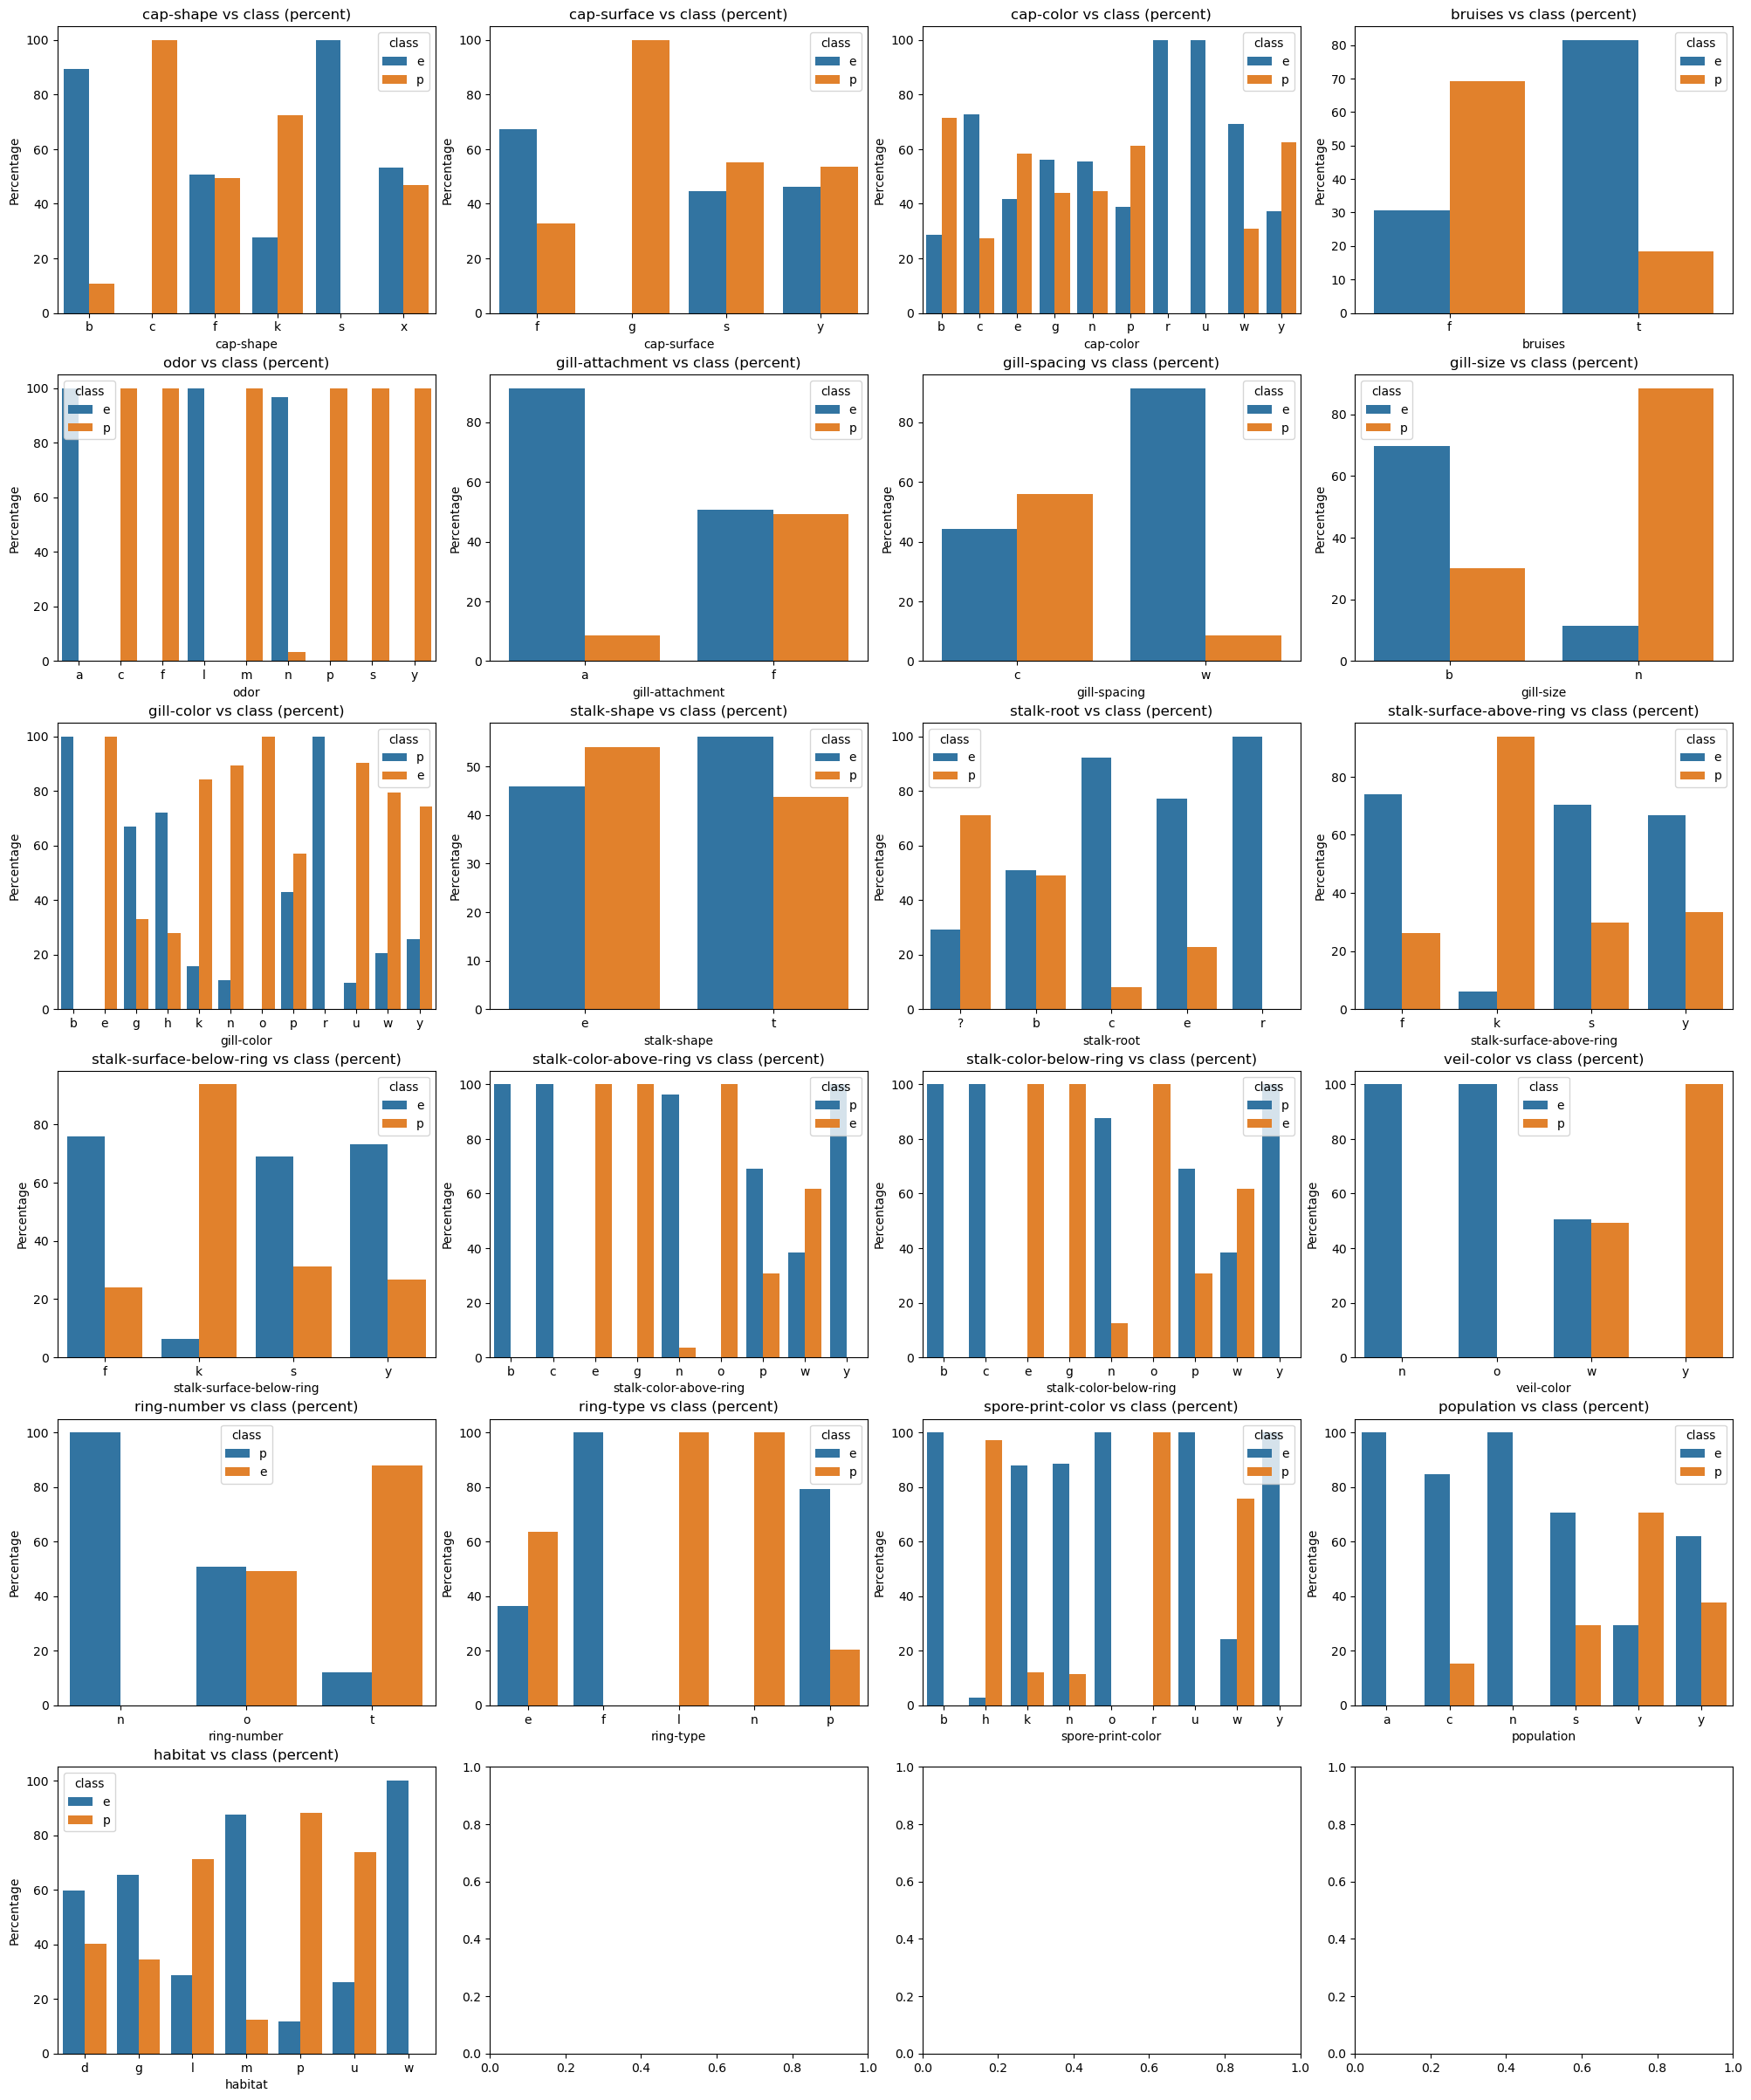

In [48]:
select_df = df.drop(columns=['class'])  #Drop target variable
n_cols = 4
n_rows = (len(select_df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

for i, col in enumerate(select_df.columns):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    percent_df=class_percentage_in_category(df, col)

    #Plot
    sns.barplot(data=percent_df, x=col, y='percentage', hue='class', ax=ax, )
    ax.set_title(f"{col} vs class (percent)")
    ax.set_ylabel("Percentage")
    ax.tick_params(axis='x')

plt.tight_layout(pad=0.5)

From these graphs, we can see that odor, stalk-color-above-ring, stalk-color-below-ring, spore-print-color, and gill-size are good  features to explore since they show a good distinction of class within each category. 

**Odor** is especially one of the most discriminative features for predicting mushroom class.

Mushrooms with odor = almond (a), anise (l), none (n) are nearly 100% edible in this dataset.

Mushrooms with odor = creosote (c), fishy (y), foul (f), musty (m), pungent (p), spicy (s), are associated with 100% poisonous mushrooms.

This means that the odor feature can serve as a reliable predictor for classifying mushrooms, especially coupled with the other features.

In [100]:
for col in select_df.columns:
    percent_df = class_percentage_in_category(df, col)
    print(f"Frequency table for {col}:")
    print(percent_df)
    print("\n" + "-"*50 + "\n")


Frequency table for cap-shape:
  cap-shape class  count  percentage
0         b     e    404   89.380531
1         b     p     48   10.619469
2         c     p      4  100.000000
3         f     e   1596   50.634518
4         f     p   1556   49.365482
5         k     e    228   27.536232
6         k     p    600   72.463768
7         s     e     32  100.000000
8         x     e   1948   53.282276
9         x     p   1708   46.717724

--------------------------------------------------

Frequency table for cap-surface:
  cap-surface class  count  percentage
0           f     e   1560   67.241379
1           f     p    760   32.758621
2           g     p      4  100.000000
3           s     e   1144   44.757433
4           s     p   1412   55.242567
5           y     e   1504   46.362515
6           y     p   1740   53.637485

--------------------------------------------------

Frequency table for cap-color:
   cap-color class  count  percentage
0          b     e     48   28.571429
1   

### Feature Distribution within Each Class (%)

Now we want to see how each feature category is distributed within classes (edible vs. poisonous). For example, among edible mushrooms, what is the percentage that odor = almond?

**P(feature category | class)**

- What is the probability of a specific feature category given a class (edible or poisonous).

In [101]:
def compare_categorical(df,column_name,selections,**kwargs):
    out = list()
    values = df[column_name].unique()
    
    for label,selection in selections.items():        
        total = np.sum(selection)
        df_0=df[selection]
        out.append([label] + [ np.sum(df_0[column_name]==val)/total for val in values ])
        
    return out,values

In [102]:
from IPython.display import HTML, display
import tabulate

In [107]:
selection_dict={"Edible":df["class"]=="e","Poisonous":df["class"]=="p"}

for cat_feature in select_df:
    print (" ")
    print(cat_feature)
    results = compare_categorical(df,cat_feature,selection_dict)
    display(HTML(tabulate.tabulate(results[0], tablefmt='html', headers=results[1])))
  

 
cap-shape


,x,b,s,f,k,c
Edible,0.462928,0.0960076,0.00760456,0.379278,0.0541825,0
Poisonous,0.436159,0.0122574,0,0.397344,0.153218,0.00102145


 
cap-surface


,s,y,f,g
Edible,0.271863,0.357414,0.370722,0
Poisonous,0.360572,0.444331,0.194076,0.00102145


 
cap-color


,n,y,w,g,e,p,b,u,c,r
Edible,0.30038,0.095057,0.171103,0.245247,0.148289,0.013308,0.0114068,0.00380228,0.00760456,0.00380228
Poisonous,0.26047,0.171604,0.081716,0.206333,0.223698,0.0224719,0.0306435,0,0.00306435,0


 
bruises


,t,f
Edible,0.653992,0.346008
Poisonous,0.159346,0.840654


 
odor


,p,a,l,n,f,c,y,s,m
Edible,0,0.095057,0.095057,0.809886,0,0,0,0,0
Poisonous,0.0653728,0,0,0.0306435,0.551583,0.0490296,0.147089,0.147089,0.00919305


 
gill-attachment


,f,a
Edible,0.954373,0.0456274
Poisonous,0.995403,0.00459653


 
gill-spacing


,c,w
Edible,0.714829,0.285171
Poisonous,0.971399,0.0286006


 
gill-size


,n,b
Edible,0.0684411,0.931559
Poisonous,0.567926,0.432074


 
gill-color


,k,n,g,p,w,h,u,e,b,r,y,o
Edible,0.081749,0.222433,0.0589354,0.202471,0.227186,0.0484791,0.105513,0.0228137,0,0,0.0152091,0.0152091
Poisonous,0.0163432,0.0286006,0.128703,0.163432,0.0628192,0.134831,0.0122574,0,0.441267,0.0061287,0.00561798,0


 
stalk-shape


,e,t
Edible,0.38403,0.61597
Poisonous,0.485189,0.514811


 
stalk-root


,e,c,b,r,?
Edible,0.205323,0.121673,0.456274,0.0456274,0.171103
Poisonous,0.0653728,0.011236,0.473953,0,0.449438


 
stalk-surface-above-ring


,s,f,k,y
Edible,0.865019,0.0969582,0.0342205,0.00380228
Poisonous,0.392237,0.0367722,0.568948,0.0020429


 
stalk-surface-below-ring


,s,f,y,k
Edible,0.807985,0.108365,0.0494297,0.0342205
Poisonous,0.392237,0.0367722,0.0194076,0.551583


 
stalk-color-above-ring


,w,g,p,n,b,e,o,c,y
Edible,0.653992,0.136882,0.136882,0.00380228,0,0.0228137,0.0456274,0,0
Poisonous,0.437181,0,0.33095,0.110317,0.110317,0,0,0.00919305,0.0020429


 
stalk-color-below-ring


,w,p,g,b,n,e,y,o,c
Edible,0.642586,0.136882,0.136882,0,0.0152091,0.0228137,0,0.0456274,0
Poisonous,0.429009,0.33095,0,0.110317,0.114402,0,0.0061287,0,0.00919305


 
veil-color


,w,n,o,y
Edible,0.954373,0.0228137,0.0228137,0
Poisonous,0.997957,0,0,0.0020429


 
ring-number


,o,t,n
Edible,0.874525,0.125475,0
Poisonous,0.972421,0.0183861,0.00919305


 
ring-type


,p,e,l,f,n
Edible,0.749049,0.239544,0,0.0114068,0
Poisonous,0.208376,0.451481,0.33095,0,0.00919305


 
spore-print-color


,k,n,u,h,w,r,o,y,b
Edible,0.391635,0.414449,0.0114068,0.0114068,0.136882,0,0.0114068,0.0114068,0.0114068
Poisonous,0.0572012,0.0572012,0,0.404494,0.462717,0.0183861,0,0,0


 
population


,s,n,a,v,y,c
Edible,0.209125,0.095057,0.0912548,0.28327,0.252852,0.0684411
Poisonous,0.0939734,0,0,0.727273,0.165475,0.0132789


 
habitat


,u,g,m,d,p,w,l
Edible,0.0228137,0.334601,0.0608365,0.446768,0.0323194,0.0456274,0.0570342
Poisonous,0.0694586,0.188968,0.00919305,0.3238,0.257406,0,0.151175


In [105]:
selection_dict={"Edible":df["class"]=="e","Poisonous":df["class"]=="p"}
for cat_feature in [ 'odor', 'gill-size','gill-color', 'bruises','stalk-surface-above-ring',
                    'stalk-surface-below-ring','spore-print-color']:
    print(" ")
    print(cat_feature)
    results = compare_categorical(df,cat_feature,selection_dict)
    display(HTML(tabulate.tabulate(results[0], tablefmt='html', headers=results[1])))

 
odor


,p,a,l,n,f,c,y,s,m
Edible,0,0.095057,0.095057,0.809886,0,0,0,0,0
Poisonous,0.0653728,0,0,0.0306435,0.551583,0.0490296,0.147089,0.147089,0.00919305


 
gill-size


,n,b
Edible,0.0684411,0.931559
Poisonous,0.567926,0.432074


 
gill-color


,k,n,g,p,w,h,u,e,b,r,y,o
Edible,0.081749,0.222433,0.0589354,0.202471,0.227186,0.0484791,0.105513,0.0228137,0,0,0.0152091,0.0152091
Poisonous,0.0163432,0.0286006,0.128703,0.163432,0.0628192,0.134831,0.0122574,0,0.441267,0.0061287,0.00561798,0


 
bruises


,t,f
Edible,0.653992,0.346008
Poisonous,0.159346,0.840654


 
stalk-surface-above-ring


,s,f,k,y
Edible,0.865019,0.0969582,0.0342205,0.00380228
Poisonous,0.392237,0.0367722,0.568948,0.0020429


 
stalk-surface-below-ring


,s,f,y,k
Edible,0.807985,0.108365,0.0494297,0.0342205
Poisonous,0.392237,0.0367722,0.0194076,0.551583


 
spore-print-color


,k,n,u,h,w,r,o,y,b
Edible,0.391635,0.414449,0.0114068,0.0114068,0.136882,0,0.0114068,0.0114068,0.0114068
Poisonous,0.0572012,0.0572012,0,0.404494,0.462717,0.0183861,0,0,0


Based on these tables, I observed similar patterns to those from the earlier visualizations. Edible mushrooms most commonly have the odor category none (n), which accounts for approximately 81% of edible samples. In contrast, poisonous mushrooms are strongly associated with a foul (f) odor, ocurring in about 55% of cases.

Gill-color is also an important feature. Buff (b) gill-color is observed in 44% of poisonous mushrooms and 0% of edible ones, showing its a strong indicator. For the bruises feature, 60% of edible mushrooms have bruises, while 84% of poisonous mushrooms do not. This is an important inverse pattern between the two.

These tables help to determine the most common feature categories associated with each mushroom class (edible or poisonous) and also help to identify patterns to build a strong classification model. 